In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math
import numpy as np

In [8]:
#I tried a different encoding because utf-8 wasn't working
df = pd.read_csv('../Tyre/tyre2019-2024.csv', encoding="ISO-8859-1")
# expand each row based on the number of laps from 'From' to 'To'
expanded_rows = []

for _, row in df.iterrows():
    for lap in range(row['From'], row['To'] + 1):
        # create a new row for each lap
        expanded_row = row.copy()
        expanded_row['Lap'] = lap  
        # add the lap number as a new column
        expanded_rows.append(expanded_row)

# create a new DataFrame with the expanded rows
df_tyre_2019 = pd.DataFrame(expanded_rows)

# drop the original 'From' and 'To' columns as they are now represented by individual lap entries
df_tyre_2019.drop(['From', 'To', 'Unnamed: 7'], axis=1, inplace=True)
df_tyre_2019.to_csv('expanded_tyre_data.csv', index=False)
print(df_tyre_2019.head())

            Driver         GP      Tyres  #Laps  Year  Lap
0  Valtteri Bottas  Australia  Soft Used     23  2019    1
0  Valtteri Bottas  Australia  Soft Used     23  2019    2
0  Valtteri Bottas  Australia  Soft Used     23  2019    3
0  Valtteri Bottas  Australia  Soft Used     23  2019    4
0  Valtteri Bottas  Australia  Soft Used     23  2019    5


In [9]:
df_tyre = df_tyre_2019.drop(columns=['#Laps'])
df_tyre.head(5)


,Driver,GP,Tyres,Year,Lap
0,Valtteri Bottas,Australia,Soft Used,2019,1
0,Valtteri Bottas,Australia,Soft Used,2019,2
0,Valtteri Bottas,Australia,Soft Used,2019,3
0,Valtteri Bottas,Australia,Soft Used,2019,4
0,Valtteri Bottas,Australia,Soft Used,2019,5


In [10]:
#data cleaning
df_tyre_2019 = df_tyre_2019.dropna()
df_tyre_2019.isna().sum()

Driver    0
GP        0
Tyres     0
#Laps     0
Year      0
Lap       0
dtype: int64

In [11]:
df_tyre_2019.shape
# getting basic attributes of dataset

(134961, 6)

In [12]:
df_tyre_2019.describe()
# making sure values seems reasonable

,#Laps,Year,Lap
count,134961.000000,134961.000000,134961.000000
mean,27.464934,2021.523307,30.562844
std,11.861198,1.697716,18.444829
min,1.000000,2019.000000,1.000000
25%,19.000000,2020.000000,15.000000
50%,26.000000,2022.000000,30.000000
75%,35.000000,2023.000000,45.000000
max,77.000000,2024.000000,87.000000


In [13]:
df_tyre_2019.head(5)

,Driver,GP,Tyres,#Laps,Year,Lap
0,Valtteri Bottas,Australia,Soft Used,23,2019,1
0,Valtteri Bottas,Australia,Soft Used,23,2019,2
0,Valtteri Bottas,Australia,Soft Used,23,2019,3
0,Valtteri Bottas,Australia,Soft Used,23,2019,4
0,Valtteri Bottas,Australia,Soft Used,23,2019,5


In [14]:
df_weather_2019 = pd.read_csv('weather_2019.csv')

In [15]:
df_weather_2019.rename(columns={'LapNumber': 'Lap'}, inplace=True)
df_weather_2019['Lap'] = df_weather_2019['Lap'].astype(int)
#this renames Lapnumber to Lap to make it easier during mergins
#this also makes all float lap values into integers for easier merging

In [16]:
df_weather_2019.head(5)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Lap,Driver
0,0 days 00:00:56.546000,23.3,66.9,1016.8,False,40.2,204,1.1,1,HAM
1,0 days 00:01:56.728000,23.4,66.9,1016.7,False,40.2,193,1.5,1,HAM
2,0 days 00:02:56.521000,23.6,66.1,1016.7,False,40.4,147,1.0,1,HAM
3,0 days 00:03:56.540000,23.7,65.4,1016.7,False,40.4,177,1.2,1,HAM
4,0 days 00:04:56.547000,23.7,65.9,1016.8,False,40.4,149,1.0,1,HAM


In [17]:
df_weather_2019.isna().sum()
#checking for missing values

Time             0
AirTemp          0
Humidity         0
Pressure         0
Rainfall         0
TrackTemp        0
WindDirection    0
WindSpeed        0
Lap              0
Driver           0
dtype: int64

In [18]:
df_weather_2019.describe()

,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Lap
count,67901.000000,67901.000000,67901.000000,67901.000000,67901.000000,67901.000000,67901.000000
mean,23.090542,52.742917,990.900474,37.238462,171.241234,1.781414,19.188274
std,4.015444,16.957516,48.848688,8.497937,103.775467,1.098546,19.167852
min,14.600000,12.900000,779.700000,25.100000,0.000000,0.000000,1.000000
25%,20.700000,45.300000,989.000000,29.400000,86.000000,1.000000,1.000000
50%,22.000000,54.500000,1008.900000,35.200000,174.000000,1.500000,12.000000
75%,25.700000,64.600000,1015.400000,43.200000,254.000000,2.200000,33.000000
max,35.300000,90.300000,1023.700000,57.400000,359.000000,7.900000,78.000000


In [19]:
df_tyre_2019['Driver'] = df_tyre_2019['Driver'].apply(
    lambda x: x.split()[-1][:3].upper() if isinstance(x, str) else x
)
df_tyre_2019.head(10)
#this is converting the full driver names to the first three letters of the second name
#this makes it easier to concatenate with weather data

,Driver,GP,Tyres,#Laps,Year,Lap
0,BOT,Australia,Soft Used,23,2019,1
0,BOT,Australia,Soft Used,23,2019,2
0,BOT,Australia,Soft Used,23,2019,3
0,BOT,Australia,Soft Used,23,2019,4
0,BOT,Australia,Soft Used,23,2019,5
0,BOT,Australia,Soft Used,23,2019,6
0,BOT,Australia,Soft Used,23,2019,7
0,BOT,Australia,Soft Used,23,2019,8
0,BOT,Australia,Soft Used,23,2019,9
0,BOT,Australia,Soft Used,23,2019,10


In [20]:
# merge on LapNumber and Driver with a left join to keep all weather data and corresponding tyre data
df_merged = pd.merge(df_weather_2019, df_tyre_2019, how='left', on=['Lap', 'Driver'])
df_merged = df_merged[df_merged['Tyres'] != 'Lluvia Extrema Usado']
df_merged = df_merged[df_merged['Tyres'].notna()]
df_merged.to_csv('merged_weather_tyre_data_2019.csv', index=False)
print(df_merged.head())


                     Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
1  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
2  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
3  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
4  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   

   WindDirection  WindSpeed  Lap Driver          GP        Tyres  #Laps  \
0            204        1.1    1    HAM   Australia    Soft Used   15.0   
1            204        1.1    1    HAM     Bahrain    Soft Used   13.0   
2            204        1.1    1    HAM       China  Medium Used   22.0   
3            204        1.1    1    HAM  Azerbaijan    Soft Used   13.0   
4            204        1.1    1    HAM       Spain    Soft Used   27.0   

     Year  
0  2019.0  
1  2019.0  
2  2019.0  
3  2019.0  
4  2019.0  


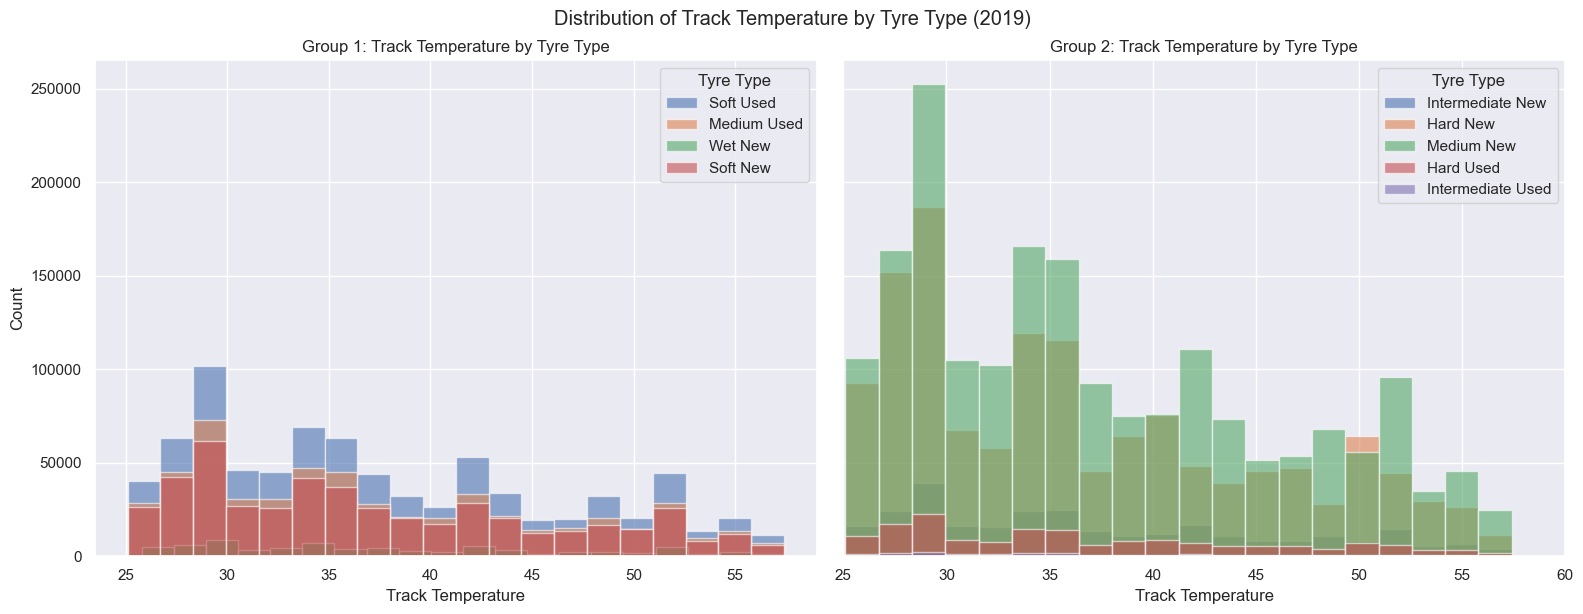

In [21]:
# Split tyre types into two groups
tyre_types = df_merged['Tyres'].unique()
group_1 = tyre_types[:len(tyre_types)//2]
group_2 = tyre_types[len(tyre_types)//2:]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['TrackTemp'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Track Temperature by Tyre Type')
axes[0].set_xlabel('Track Temperature')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['TrackTemp'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Track Temperature by Tyre Type')
axes[1].set_xlabel('Track Temperature')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(25, 60)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Track Temperature by Tyre Type (2019)', y=1.02)
plt.show()

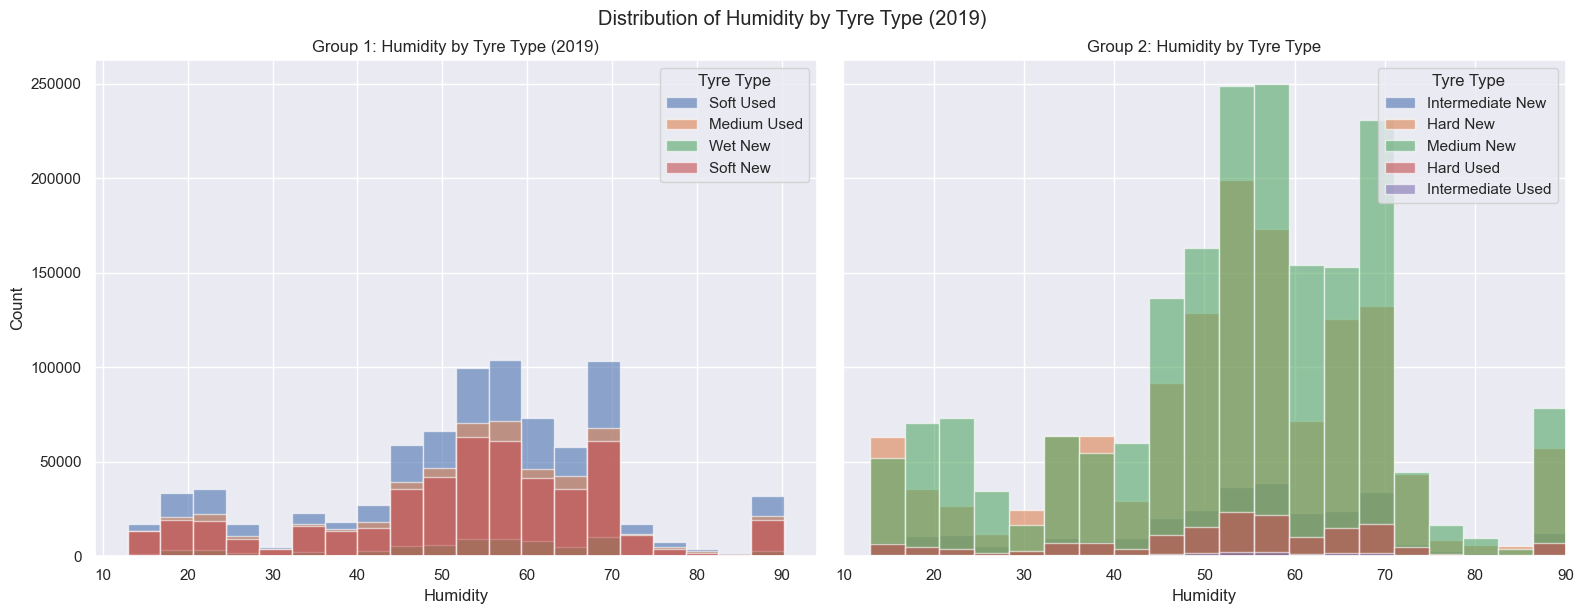

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['Humidity'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Humidity by Tyre Type (2019)')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['Humidity'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Humidity by Tyre Type')
axes[1].set_xlabel('Humidity')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(10, 90)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Humidity by Tyre Type (2019)', y=1.02)
plt.show()

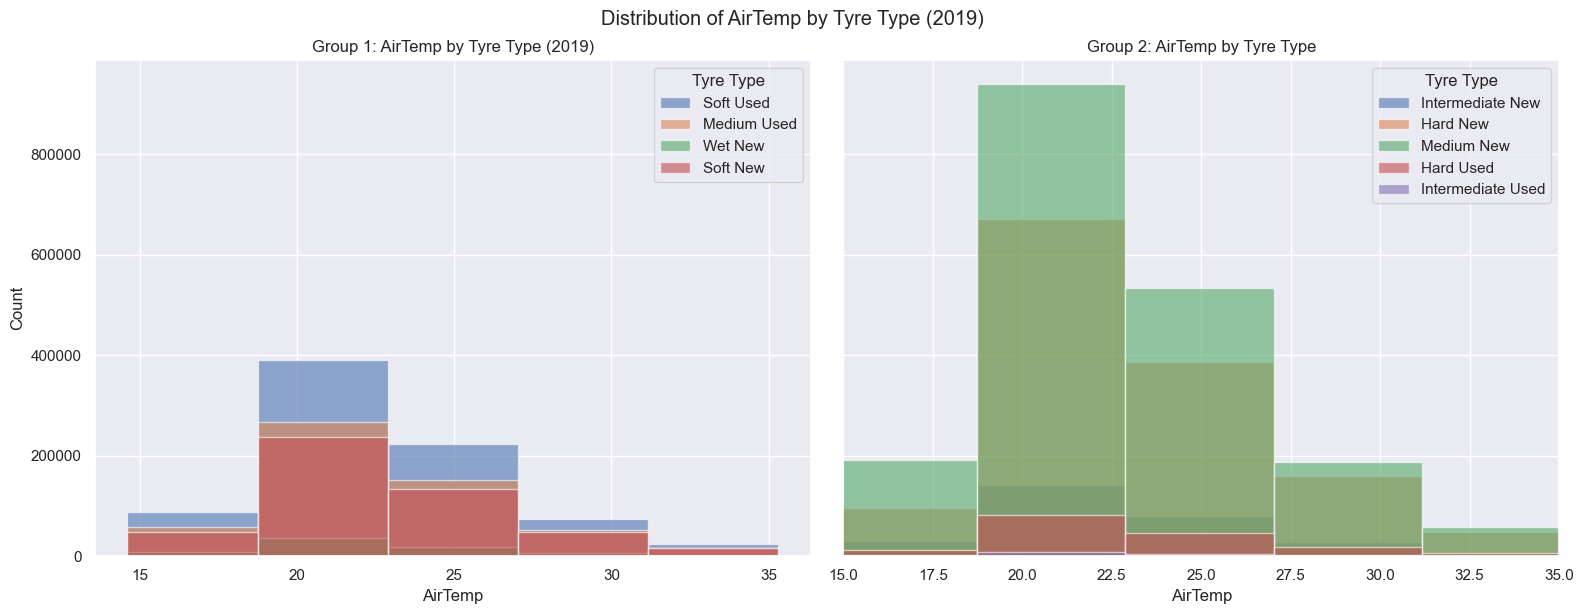

In [23]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['AirTemp'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: AirTemp by Tyre Type (2019)')
axes[0].set_xlabel('AirTemp')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['AirTemp'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: AirTemp by Tyre Type')
axes[1].set_xlabel('AirTemp')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(15, 35)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of AirTemp by Tyre Type (2019)', y=1.02)
plt.show()

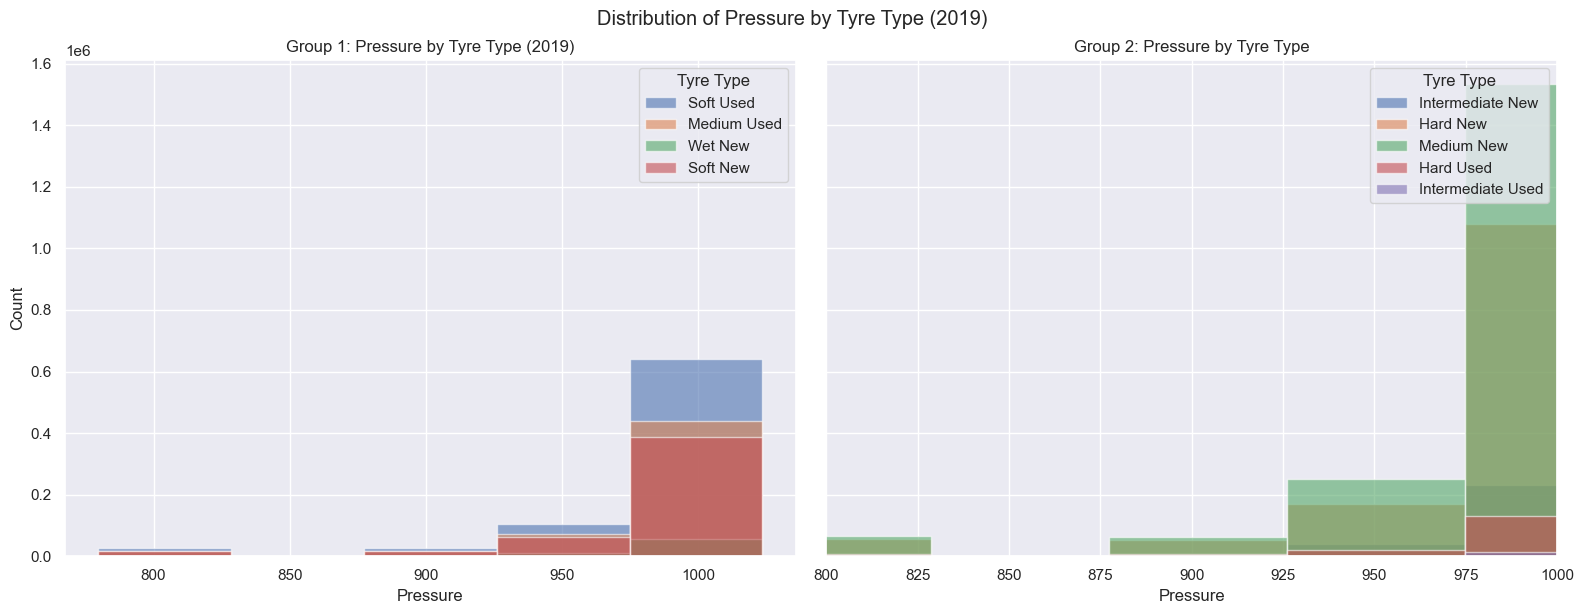

In [24]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['Pressure'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Pressure by Tyre Type (2019)')
axes[0].set_xlabel('Pressure')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['Pressure'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Pressure by Tyre Type')
axes[1].set_xlabel('Pressure')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(800, 1000)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Pressure by Tyre Type (2019)', y=1.02)
plt.show()

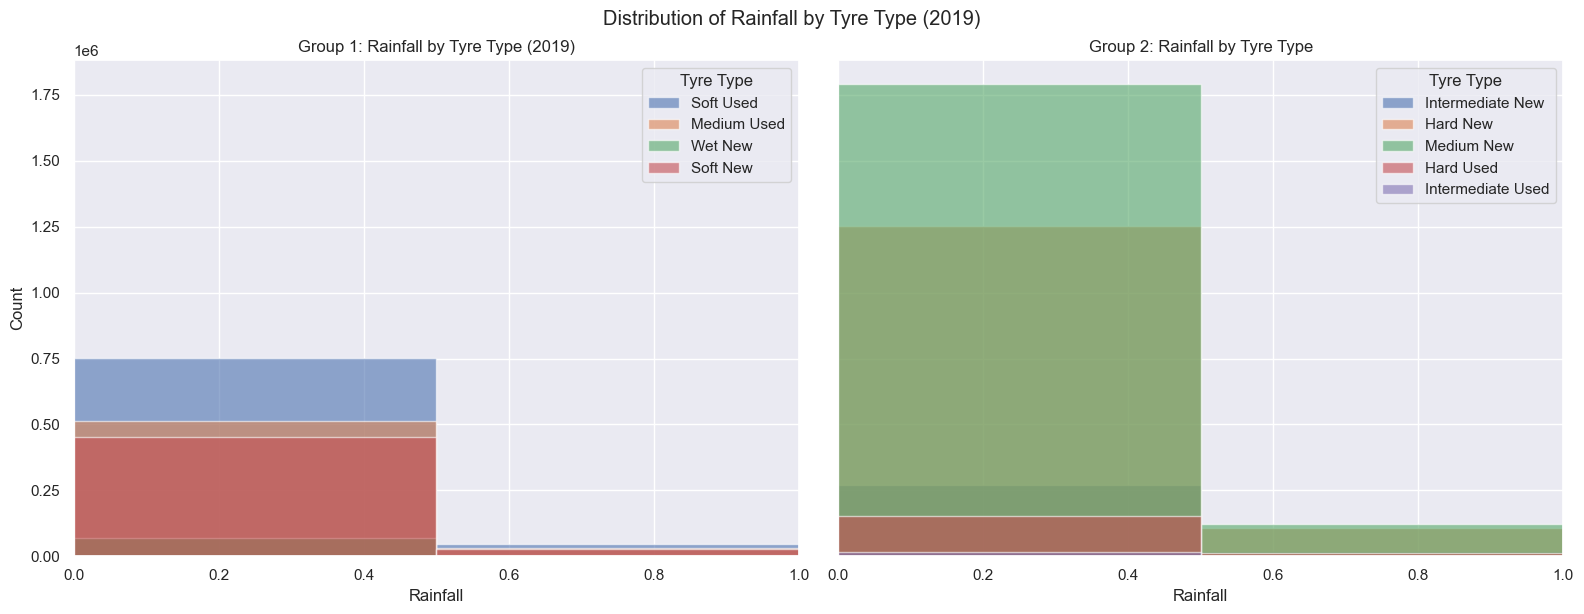

In [25]:
#switched boolean to ints to make it easier (true - 1, false - 0)
df_merged['Rainfall'] = np.where(df_merged['Rainfall'], 1, 0)
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['Rainfall'].dropna(), bins=2, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Rainfall by Tyre Type (2019)')
axes[0].set_xlabel('Rainfall')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')
axes[0].set_xlim(0, 1)

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['Rainfall'].dropna(), bins=2, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Rainfall by Tyre Type')
axes[1].set_xlabel('Rainfall')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(0, 1)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Rainfall by Tyre Type (2019)', y=1.02)
plt.show()

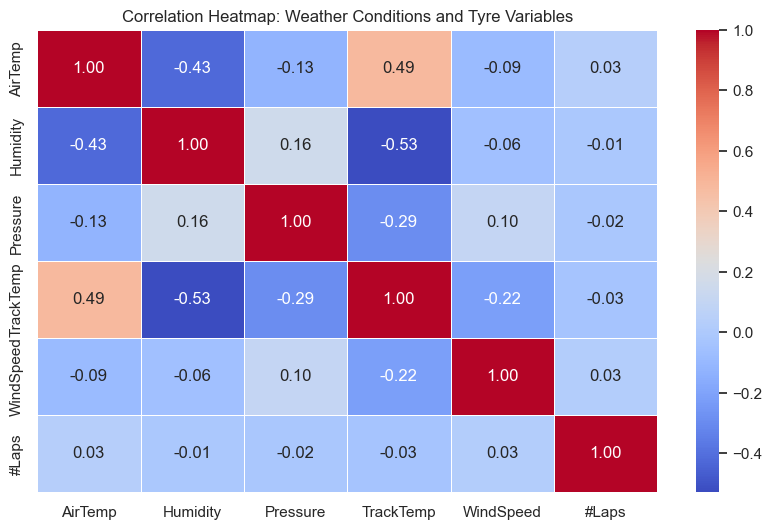

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("merged_weather_tyre_data_2019.csv")

# Select relevant numeric columns for correlation analysis
# Columns that relate to weather and lap performance
numeric_columns = ['AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed', '#Laps']
data_subset = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Weather Conditions and Tyre Variables")
plt.show()


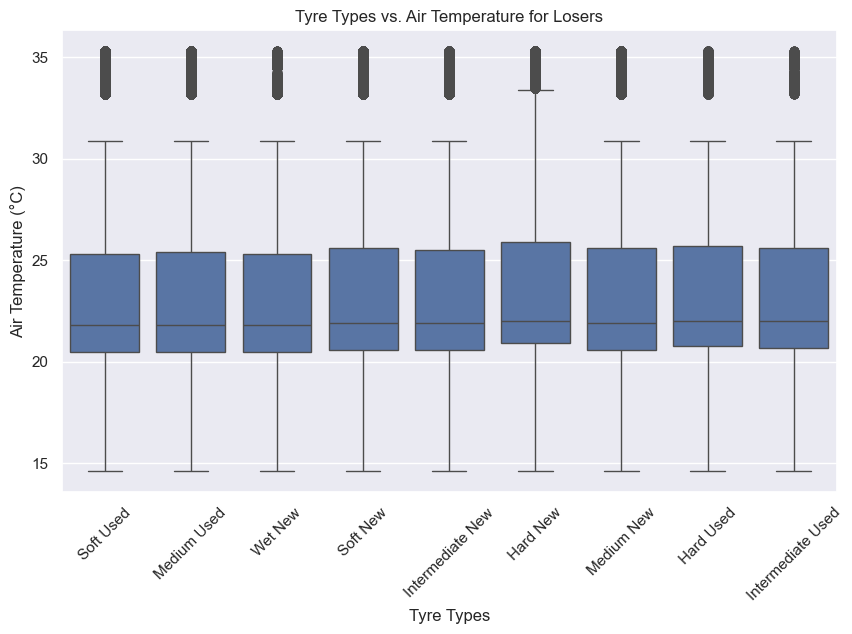

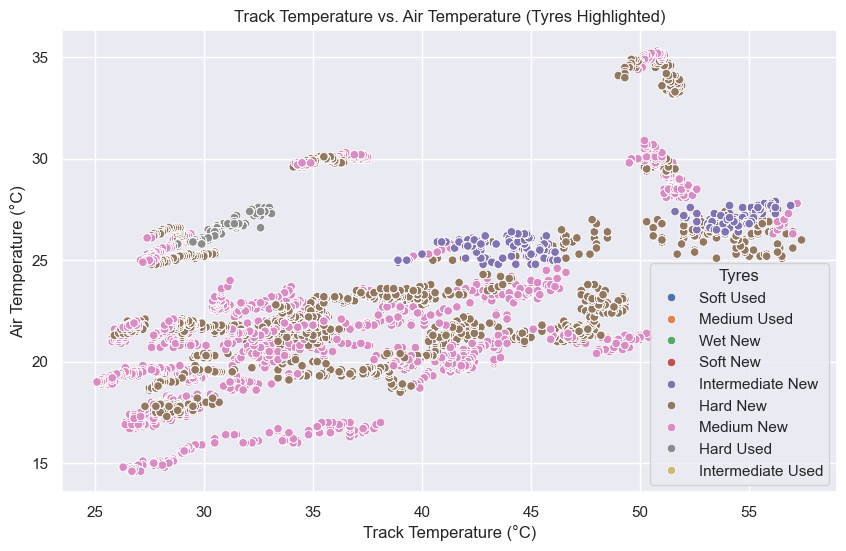

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the tyre data
tyre_df = pd.read_csv('../Tyre/tyre2019-2024.csv', encoding="ISO-8859-1")

# Determine the race winners for each GP
winners = tyre_df.groupby('GP').first().reset_index()[['GP', 'Driver']]
winners.rename(columns={'Driver': 'Winner'}, inplace=True)

# Add a 'Winner' column to df_merged
df_merged = pd.merge(df_merged, winners, on='GP', how='left')
df_merged['Is_Winner'] = df_merged['Driver'] == df_merged['Winner']

# Filter for losers
losers_df = df_merged[~df_merged['Is_Winner']]

# Visualization: Tyre Types vs Weather Conditions (e.g., AirTemp)
plt.figure(figsize=(10, 6))
sns.boxplot(data=losers_df, x='Tyres', y='AirTemp')
plt.title('Tyre Types vs. Air Temperature for Losers')
plt.xlabel('Tyre Types')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Visualization: Track Temp vs Air Temp Highlighted by Tyre Types
plt.figure(figsize=(10, 6))
sns.scatterplot(data=losers_df, x='TrackTemp', y='AirTemp', hue='Tyres')
plt.title('Track Temperature vs. Air Temperature (Tyres Highlighted)')
plt.xlabel('Track Temperature (°C)')
plt.ylabel('Air Temperature (°C)')
plt.legend(title='Tyres')
plt.show()


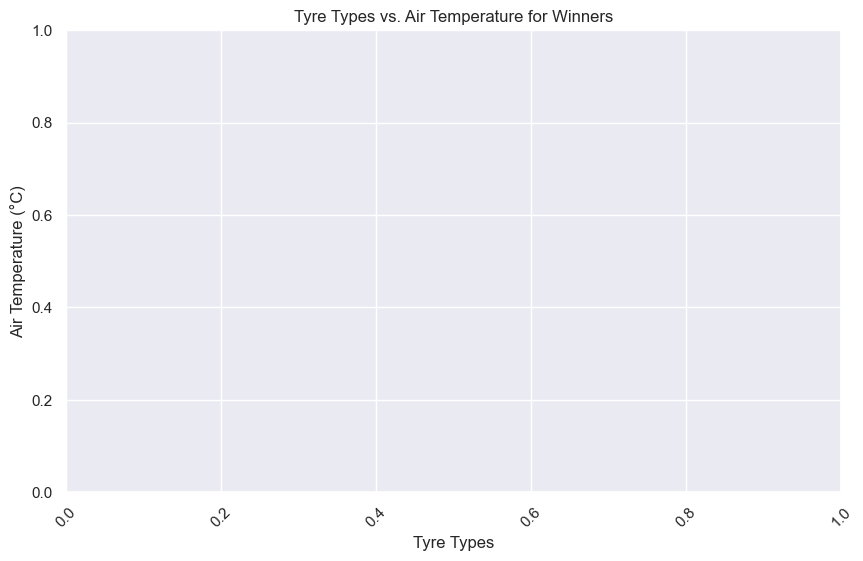

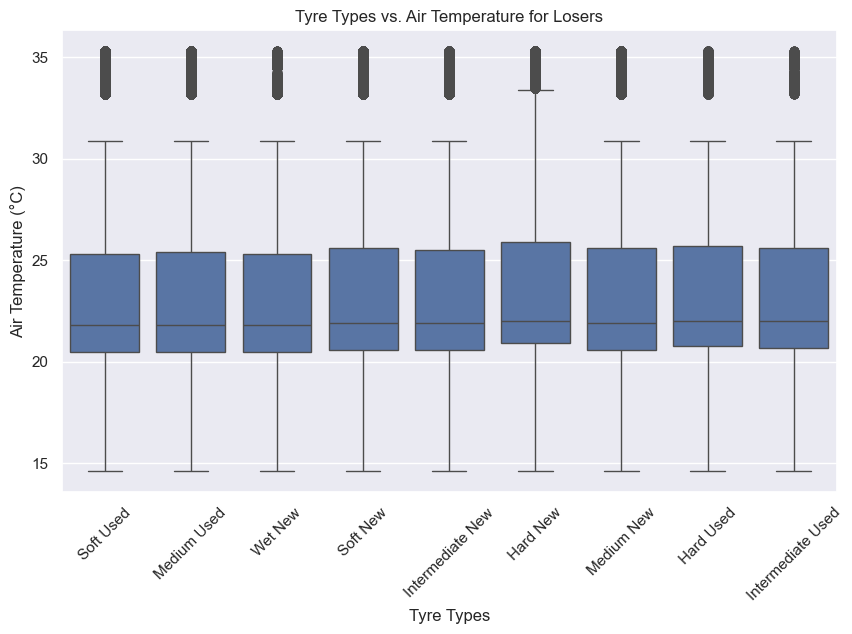

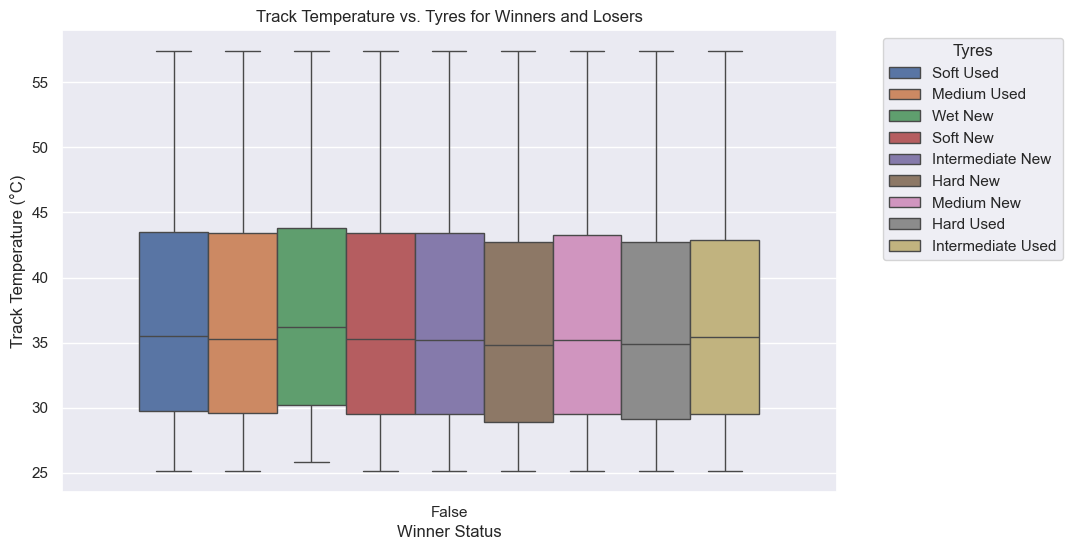

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create separate dataframes for winners and losers
winners_df = df_merged[df_merged['Is_Winner']]
losers_df = df_merged[~df_merged['Is_Winner']]

# Visualization: Tyre Types vs. Air Temperature for Winners
plt.figure(figsize=(10, 6))
sns.boxplot(data=winners_df, x='Tyres', y='AirTemp')
plt.title('Tyre Types vs. Air Temperature for Winners')
plt.xlabel('Tyre Types')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Visualization: Tyre Types vs. Air Temperature for Losers
plt.figure(figsize=(10, 6))
sns.boxplot(data=losers_df, x='Tyres', y='AirTemp')
plt.title('Tyre Types vs. Air Temperature for Losers')
plt.xlabel('Tyre Types')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Additional insight: Compare track temperature for winners vs losers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='Is_Winner', y='TrackTemp', hue='Tyres')
plt.title('Track Temperature vs. Tyres for Winners and Losers')
plt.xlabel('Winner Status')
plt.ylabel('Track Temperature (°C)')
plt.legend(title='Tyres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


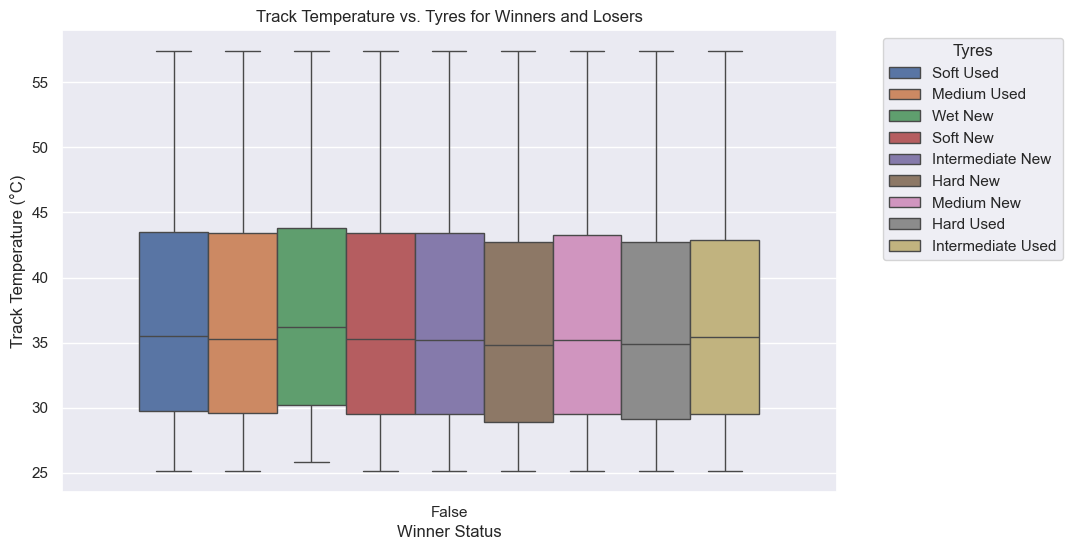

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='Is_Winner', y='TrackTemp', hue='Tyres')
plt.title('Track Temperature vs. Tyres for Winners and Losers')
plt.xlabel('Winner Status')
plt.ylabel('Track Temperature (°C)')
plt.legend(title='Tyres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [30]:
print(winners_df.shape)
print(losers_df.shape)


(0, 16)
(5645017, 16)


In [35]:
# Merge the winners DataFrame into df_merged
df_merged = pd.merge(df_merged, winners, on='GP', how='left')

# Check if 'Winner' column exists
print(df_merged.columns)

df_merged['GP'] = df_merged['GP'].str.strip().str.upper()
winners['GP'] = winners['GP'].str.strip().str.upper()
print(df_merged[['GP', 'Driver', 'Winner']].head())


Index(['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Lap', 'Driver', 'GP', 'Tyres', '#Laps',
       'Year', 'Winner_x', 'Is_Winner', 'Winner_y', 'Winner'],
      dtype='object')
           GP Driver           Winner
0   AUSTRALIA    HAM  VALTTERI BOTTAS
1     BAHRAIN    HAM   LEWIS HAMILTON
2       CHINA    HAM   LEWIS HAMILTON
3  AZERBAIJAN    HAM  VALTTERI BOTTAS
4       SPAIN    HAM   LEWIS HAMILTON


In [36]:
# Drop unnecessary Winner columns
df_merged = df_merged.drop(columns=['Winner_x', 'Winner_y'], errors='ignore')
print(df_merged[['GP', 'Driver', 'Winner']].head())


           GP Driver           Winner
0   AUSTRALIA    HAM  VALTTERI BOTTAS
1     BAHRAIN    HAM   LEWIS HAMILTON
2       CHINA    HAM   LEWIS HAMILTON
3  AZERBAIJAN    HAM  VALTTERI BOTTAS
4       SPAIN    HAM   LEWIS HAMILTON


In [37]:
# Normalize driver names to avoid mismatches
df_merged['Driver'] = df_merged['Driver'].str.strip().str.upper()
df_merged['Winner'] = df_merged['Winner'].str.strip().str.upper()

# Create Is_Winner column
df_merged['Is_Winner'] = df_merged['Driver'] == df_merged['Winner']

# Check the value counts for Is_Winner
print(df_merged['Is_Winner'].value_counts())


Is_Winner
False    5645017
Name: count, dtype: int64


In [39]:
df_merged['Winner'] = df_merged['Winner'].apply(
    lambda x: x.split()[-1][:3].upper() if isinstance(x, str) else x
)
df_merged['Is_Winner'] = df_merged['Driver'] == df_merged['Winner']
print(df_merged['Is_Winner'].value_counts())



Is_Winner
False    5265854
True      379163
Name: count, dtype: int64


Is_Winner
False    5265854
True      379163
Name: count, dtype: int64


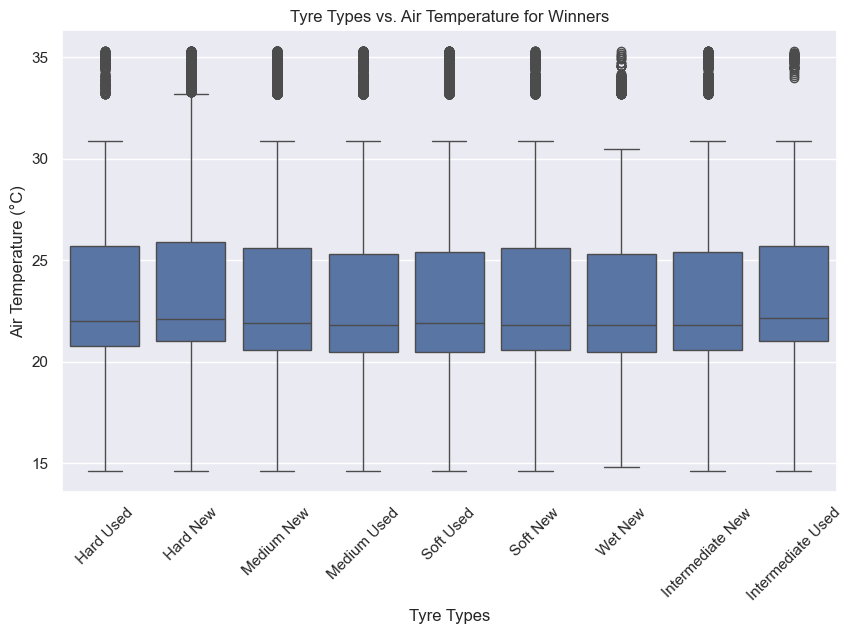

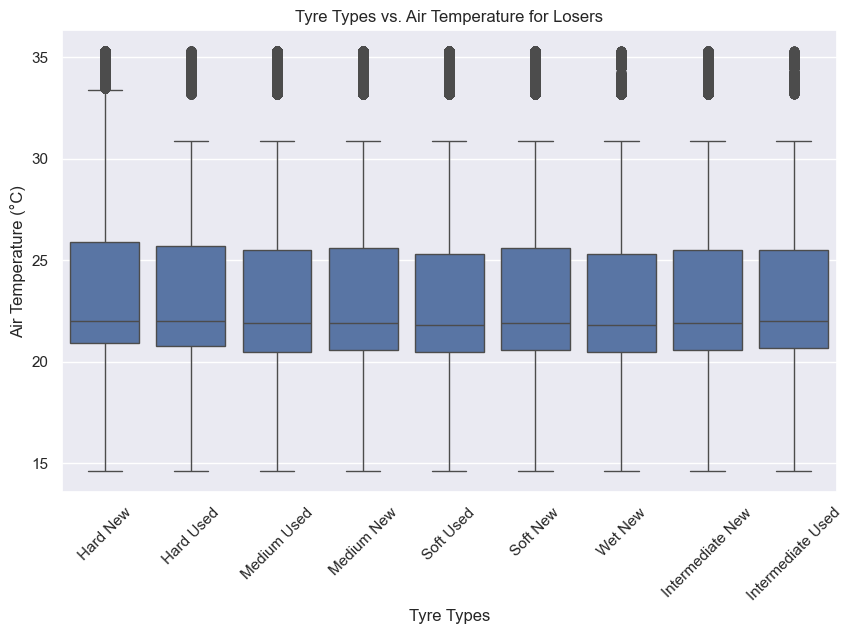

In [48]:
# Standardize Winner column to match Driver abbreviations
df_merged['Winner'] = df_merged['Winner'].apply(
    lambda x: x.split()[-1][:3].upper() if isinstance(x, str) else x
)

# Recalculate Is_Winner
df_merged['Is_Winner'] = df_merged['Driver'] == df_merged['Winner']
print(df_merged['Is_Winner'].value_counts())  # Check counts of True and False

# Separate winners and losers
winners_df = df_merged[df_merged['Is_Winner']]
losers_df = df_merged[~df_merged['Is_Winner']]


# Visualization: Tyre Types vs Air Temperature for Winners
plt.figure(figsize=(10, 6))
sns.boxplot(data=winners_df, x='Tyres', y='AirTemp')
plt.title('Tyre Types vs. Air Temperature for Winners')
plt.xlabel('Tyre Types')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Visualization: Tyre Types vs Air Temperature for Losers
plt.figure(figsize=(10, 6))
sns.boxplot(data=losers_df, x='Tyres', y='AirTemp')
plt.title('Tyre Types vs. Air Temperature for Losers')
plt.xlabel('Tyre Types')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


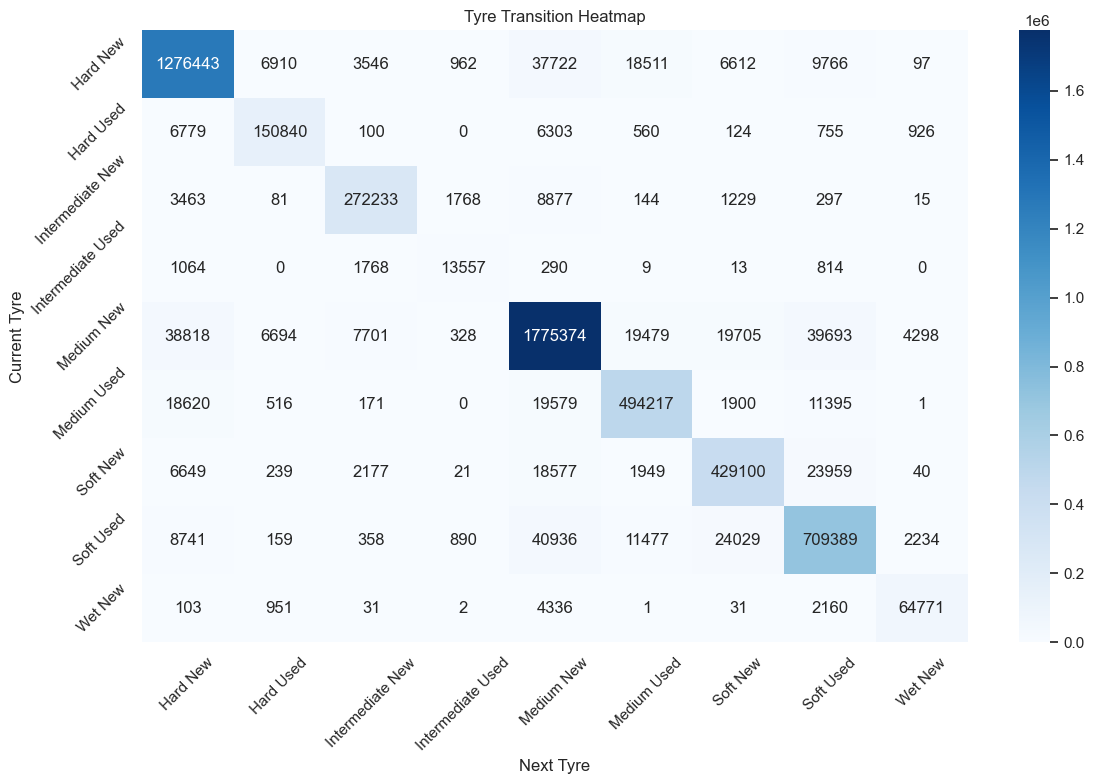

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure data is sorted by GP, Driver, and sequence of laps
df_merged = df_merged.sort_values(by=['GP', 'Driver', 'Lap'])

# Create a column to identify tyre transitions
df_merged['Next_Tyre'] = df_merged.groupby(['GP', 'Driver'])['Tyres'].shift(-1)

# Filter only rows with a valid transition
transitions = df_merged.dropna(subset=['Next_Tyre'])

# Create a transition matrix
transition_matrix = transitions.groupby(['Tyres', 'Next_Tyre']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(transition_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Tyre Transition Heatmap')
plt.xlabel('Next Tyre')
plt.ylabel('Current Tyre')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


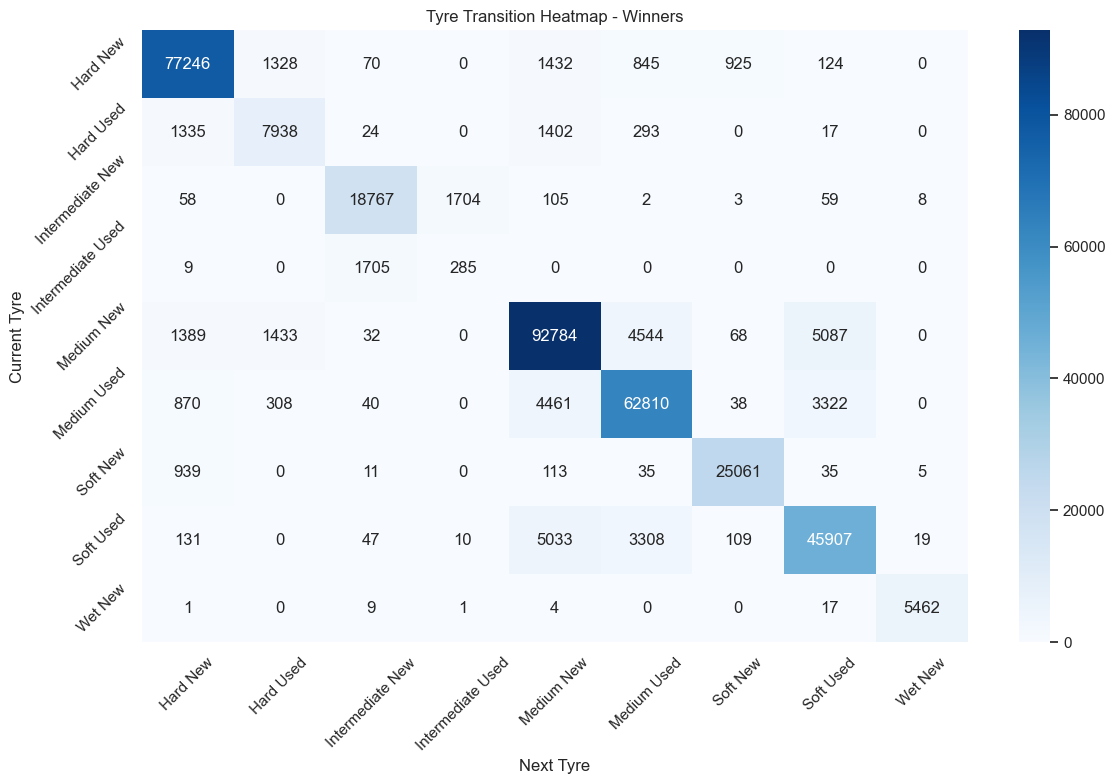

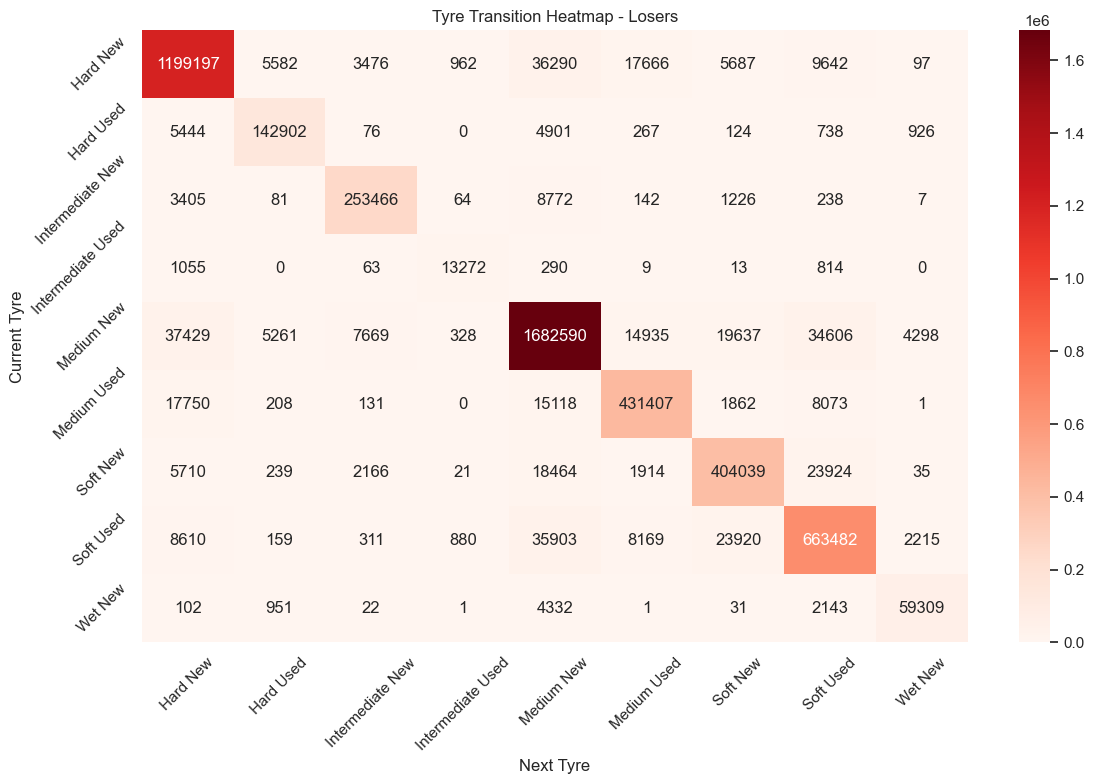

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure data is sorted by GP, Driver, and sequence of laps
df_merged = df_merged.sort_values(by=['GP', 'Driver', 'Lap'])

# Add the 'Next_Tyre' column to identify transitions
df_merged['Next_Tyre'] = df_merged.groupby(['GP', 'Driver'])['Tyres'].shift(-1)

# Separate winners and losers
winners_df = df_merged[df_merged['Is_Winner']]
losers_df = df_merged[~df_merged['Is_Winner']]

# Calculate transition matrices
winners_transitions = winners_df.dropna(subset=['Next_Tyre']).groupby(['Tyres', 'Next_Tyre']).size().unstack(fill_value=0)
losers_transitions = losers_df.dropna(subset=['Next_Tyre']).groupby(['Tyres', 'Next_Tyre']).size().unstack(fill_value=0)

# Plot Winners' Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(winners_transitions, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Tyre Transition Heatmap - Winners')
plt.xlabel('Next Tyre')
plt.ylabel('Current Tyre')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Losers' Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(losers_transitions, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.title('Tyre Transition Heatmap - Losers')
plt.xlabel('Next Tyre')
plt.ylabel('Current Tyre')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


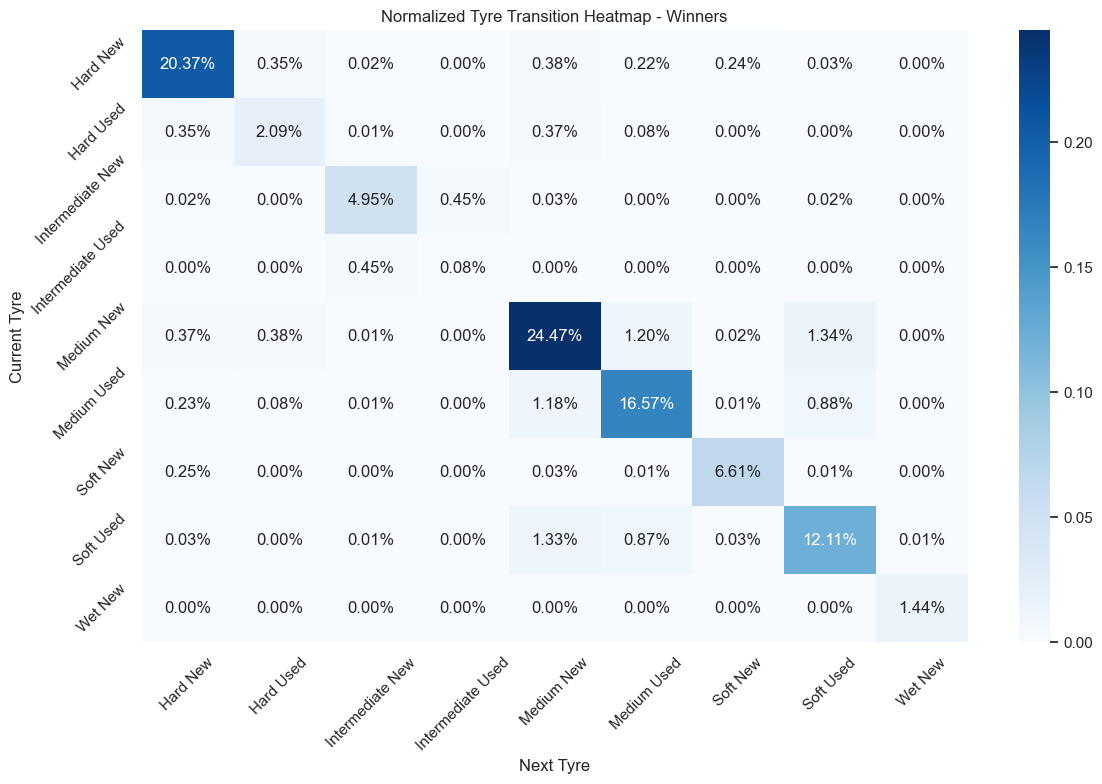

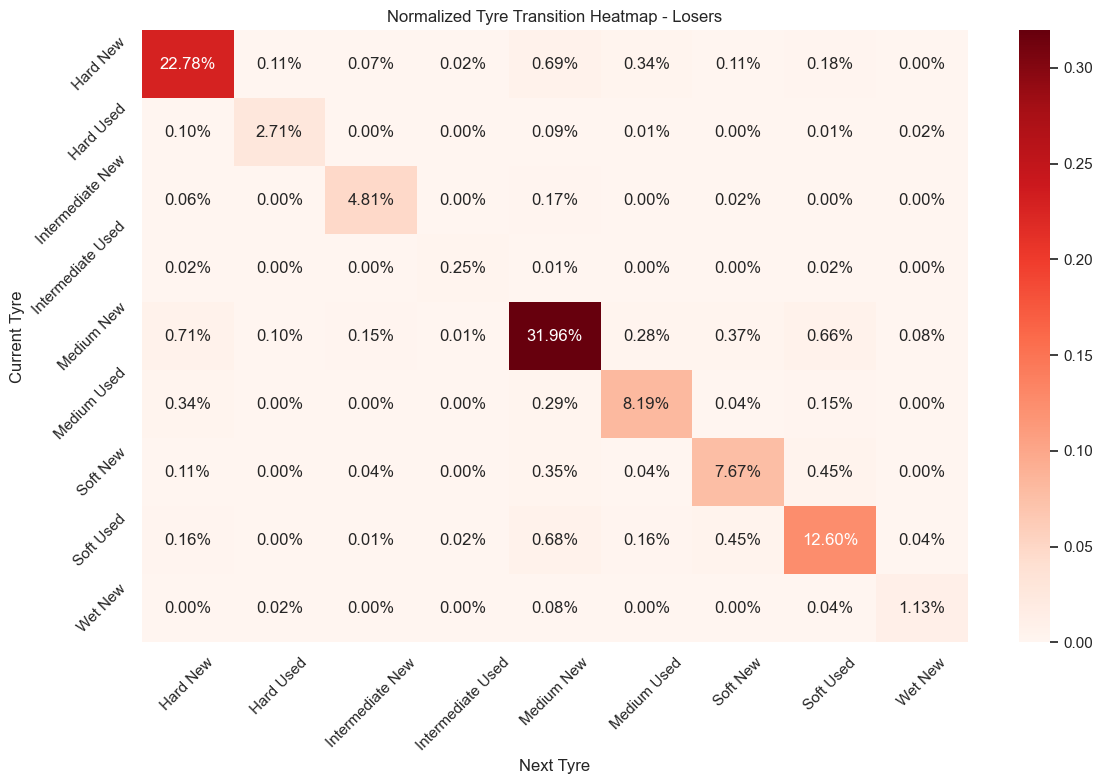

In [51]:
# Normalize the transition matrices by the total count in each group
winners_transitions_normalized = winners_transitions.div(winners_transitions.sum().sum())
losers_transitions_normalized = losers_transitions.div(losers_transitions.sum().sum())

# Plot Winners' Normalized Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(winners_transitions_normalized, annot=True, fmt=".2%", cmap="Blues", cbar=True)
plt.title('Normalized Tyre Transition Heatmap - Winners')
plt.xlabel('Next Tyre')
plt.ylabel('Current Tyre')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Losers' Normalized Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(losers_transitions_normalized, annot=True, fmt=".2%", cmap="Reds", cbar=True)
plt.title('Normalized Tyre Transition Heatmap - Losers')
plt.xlabel('Next Tyre')
plt.ylabel('Current Tyre')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# Step 1: Calculate ranks for each driver in every GP
df_merged['Finish_Rank'] = df_merged.groupby('GP')['Lap'].rank(method='dense', ascending=False)

# Step 2: Create a new column to indicate top 10 finishers
df_merged['Is_Top10'] = df_merged['Finish_Rank'] <= 10
df_merged['Is_Top5'] = df_merged['Finish_Rank'] <= 5  # For more flexibility

# Step 3: Validate the counts for Top 5 and Top 10
print(df_merged['Is_Top5'].value_counts())
print(df_merged['Is_Top10'].value_counts())
# Separate Top 5, Top 10, and Other Drivers
top5_df = df_merged[df_merged['Is_Top5']]
top10_df = df_merged[df_merged['Is_Top10']]
rest_df = df_merged[~df_merged['Is_Top10']]



Is_Top5
False    5516671
True      128346
Name: count, dtype: int64
Is_Top10
False    5341118
True      303899
Name: count, dtype: int64


In [55]:
# Function to calculate tyre transitions and plot heatmap
def calculate_transitions(data, title):
    transition_matrix = pd.crosstab(data['Tyres'], data['Next_Tyres'], normalize='index') * 100

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(transition_matrix, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
    plt.title(title)
    plt.xlabel("Next Tyre")
    plt.ylabel("Current Tyre")
    plt.show()

# For Top 5 Finishers
calculate_transitions(top5_df, "Normalized Tyre Transition Heatmap - Top 5 Finishers")

# For Top 10 Finishers
calculate_transitions(top10_df, "Normalized Tyre Transition Heatmap - Top 10 Finishers")

# For the Rest of the Field
calculate_transitions(rest_df, "Normalized Tyre Transition Heatmap - Rest of the Field")


KeyError: 'Next_Tyres'

In [56]:
# Create the 'Next_Tyres' column
df_merged['Next_Tyres'] = df_merged.groupby(['GP', 'Driver'])['Tyres'].shift(-1)
# Display a subset of relevant columns for verification
print(df_merged[['GP', 'Driver', 'Tyres', 'Next_Tyres']].head(10))
# Function to calculate tyre transitions and plot heatmap
def calculate_transitions(data, title):
    transition_matrix = pd.crosstab(data['Tyres'], data['Next_Tyres'], normalize='index') * 100

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(transition_matrix, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
    plt.title(title)
    plt.xlabel("Next Tyre")
    plt.ylabel("Current Tyre")
    plt.show()

# For Top 5 Finishers
calculate_transitions(top5_df, "Normalized Tyre Transition Heatmap - Top 5 Finishers")

# For Top 10 Finishers
calculate_transitions(top10_df, "Normalized Tyre Transition Heatmap - Top 10 Finishers")

# For the Rest of the Field
calculate_transitions(rest_df, "Normalized Tyre Transition Heatmap - Rest of the Field")


                     GP Driver        Tyres   Next_Tyres
84688  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
84788  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
84888  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
84988  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85088  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85188  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85288  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85388  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85488  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85588  70TH ANNIVERSARY    ALB  Medium Used  Medium Used


KeyError: 'Next_Tyres'

In [58]:
# Create the 'Next_Tyres' column for the main dataframe
df_merged['Next_Tyres'] = df_merged.groupby(['GP', 'Driver'])['Tyres'].shift(-1)

# Verify that the column is added correctly
print(df_merged[['GP', 'Driver', 'Tyres', 'Next_Tyres']].head(10))

# Recreate subsets after adding 'Next_Tyres'
top5_df = df_merged[df_merged['Is_Top5']]
top10_df = df_merged[df_merged['Is_Top10']]
rest_df = df_merged[~df_merged['Is_Top10']]


                     GP Driver        Tyres   Next_Tyres
84688  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
84788  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
84888  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
84988  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85088  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85188  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85288  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85388  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85488  70TH ANNIVERSARY    ALB  Medium Used  Medium Used
85588  70TH ANNIVERSARY    ALB  Medium Used  Medium Used


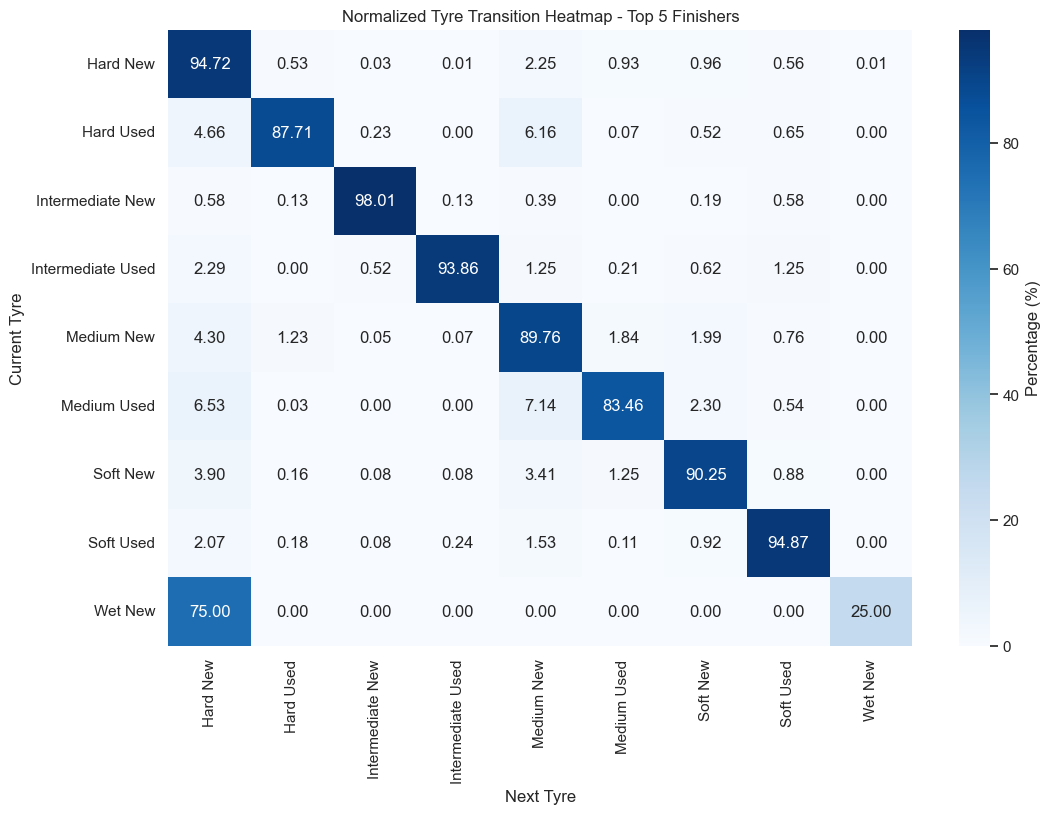

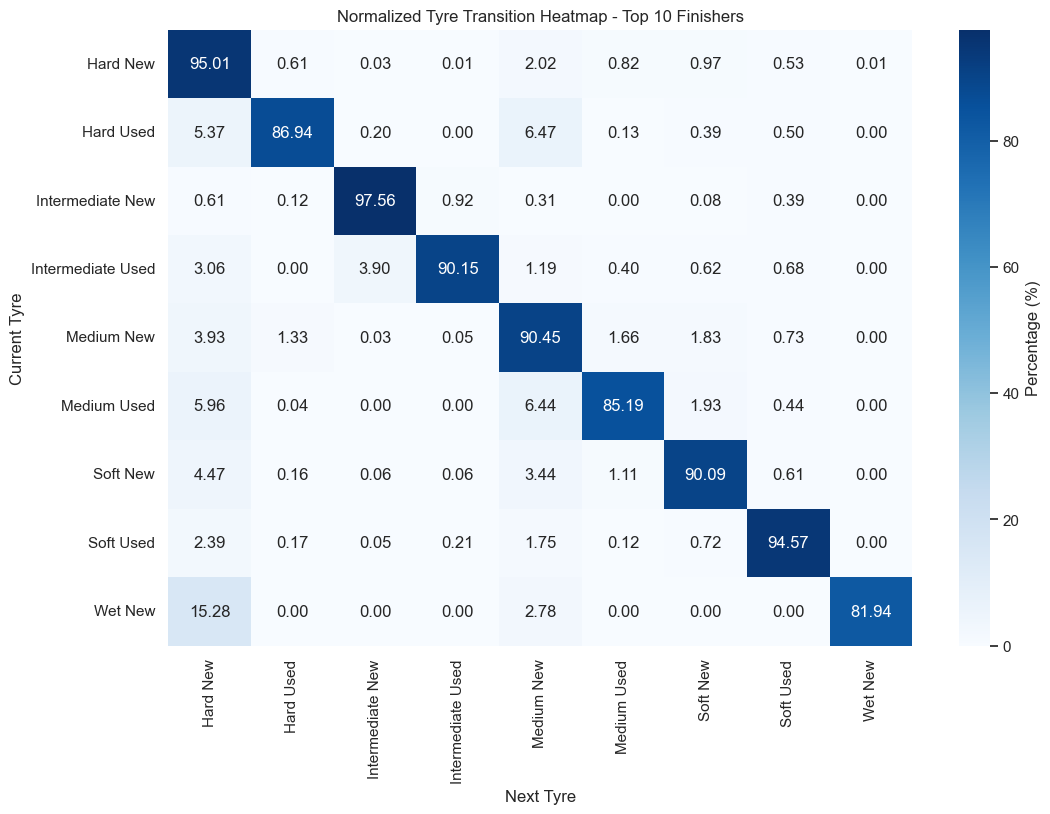

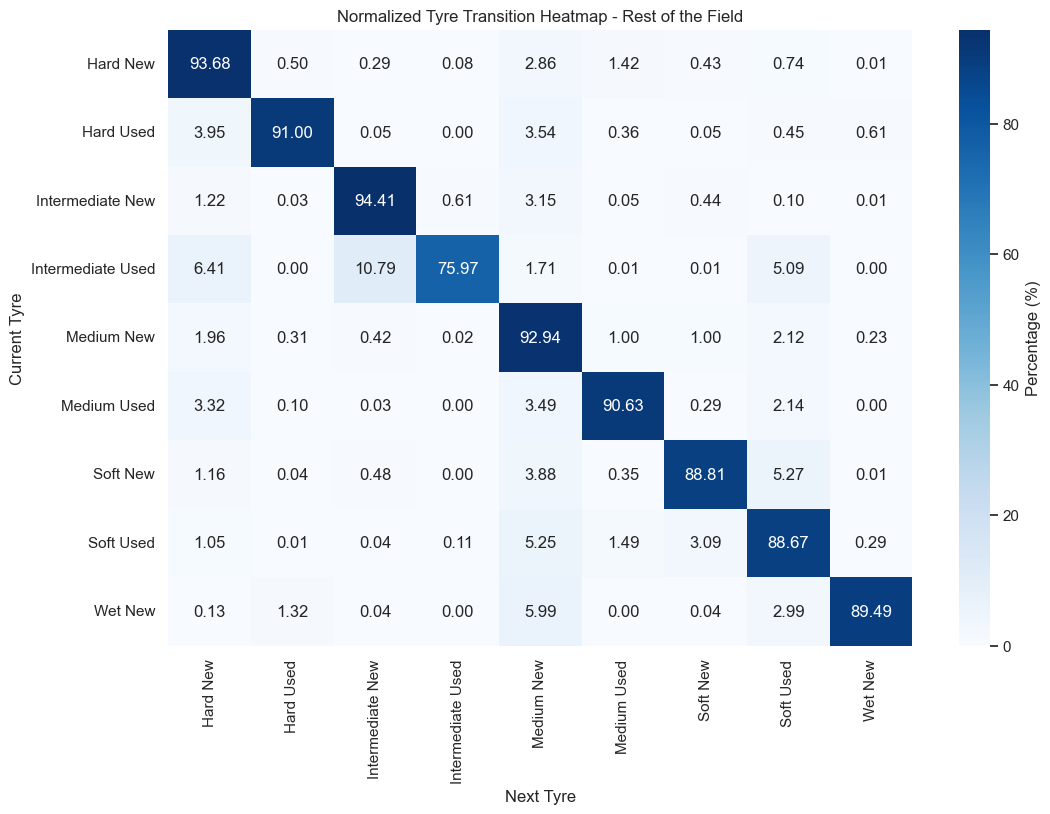

In [59]:
# Function to calculate tyre transitions and plot heatmap
def calculate_transitions(data, title):
    transition_matrix = pd.crosstab(data['Tyres'], data['Next_Tyres'], normalize='index') * 100

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(transition_matrix, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
    plt.title(title)
    plt.xlabel("Next Tyre")
    plt.ylabel("Current Tyre")
    plt.show()

# For Top 5 Finishers
calculate_transitions(top5_df, "Normalized Tyre Transition Heatmap - Top 5 Finishers")

# For Top 10 Finishers
calculate_transitions(top10_df, "Normalized Tyre Transition Heatmap - Top 10 Finishers")

# For the Rest of the Field
calculate_transitions(rest_df, "Normalized Tyre Transition Heatmap - Rest of the Field")
